In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("/Depression Student Dataset.csv")
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


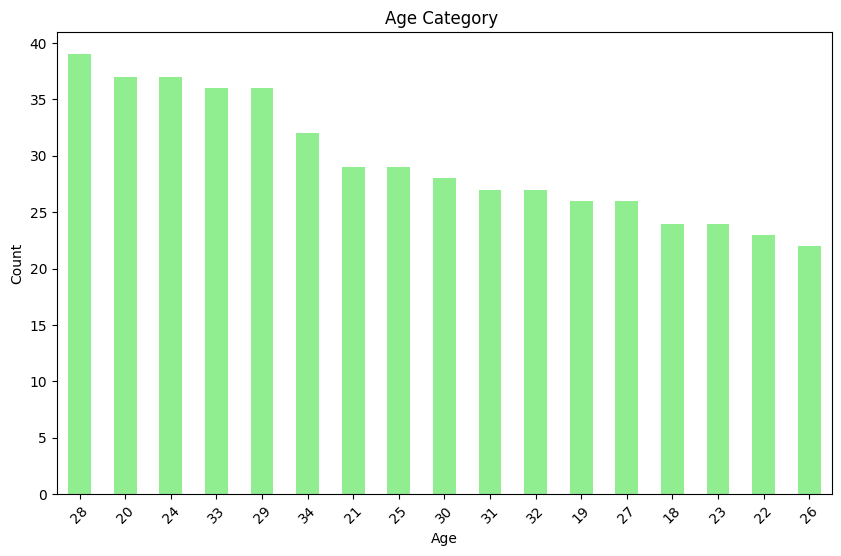

In [13]:
category_sales = df.groupby('Age').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Age Category ')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

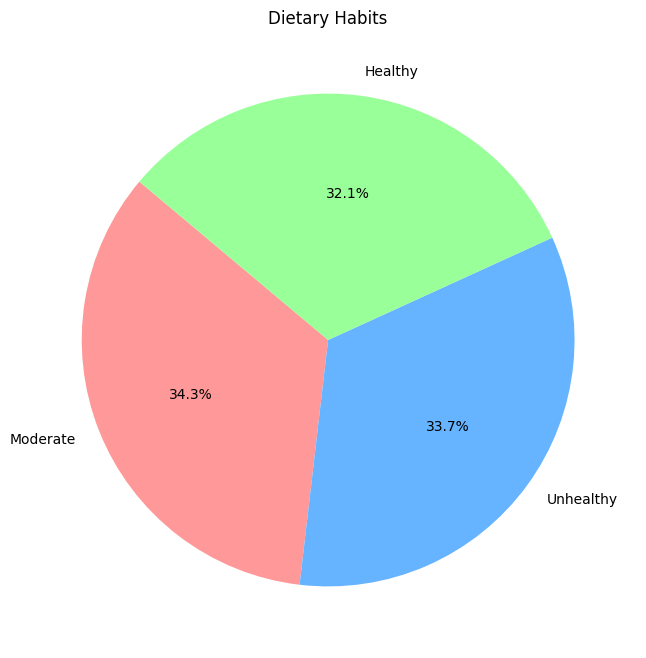

In [14]:
payment_method_dist = df['Dietary Habits'].value_counts()

plt.figure(figsize=(8, 8))
payment_method_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title('Dietary Habits')
plt.ylabel('')
plt.show()

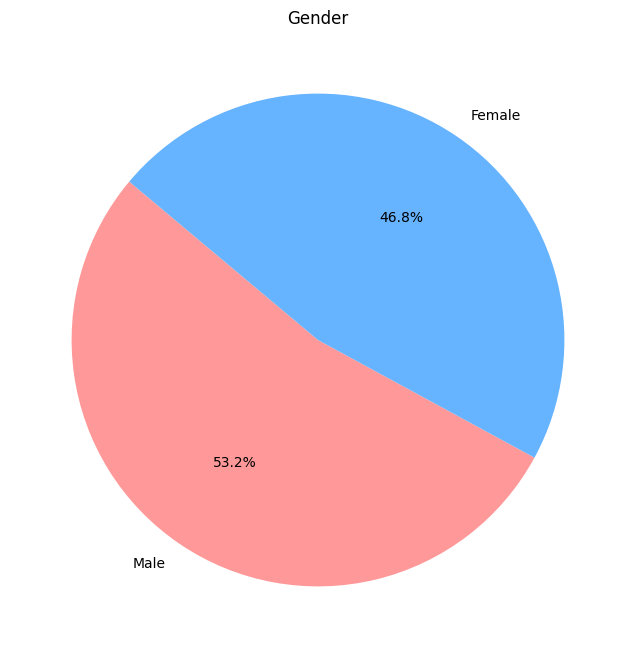

In [17]:
payment_method_dist = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
payment_method_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title('Gender')
plt.ylabel('')
plt.show()

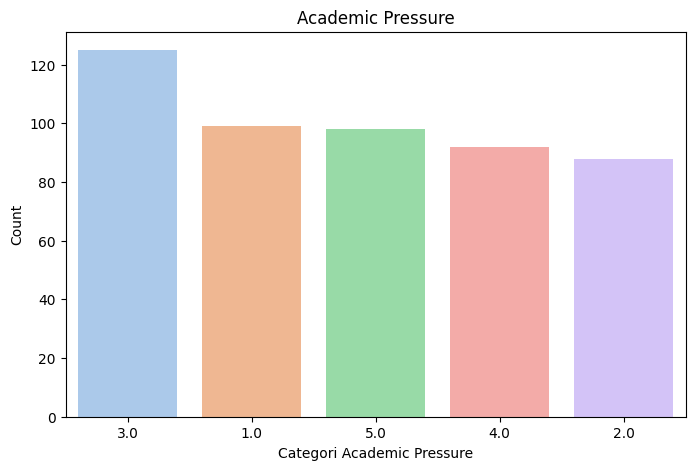

In [15]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Academic Pressure', palette='pastel', order=df['Academic Pressure'].value_counts().index)
plt.title('Academic Pressure')
plt.xlabel('Categori Academic Pressure')
plt.ylabel('Count')
plt.show()


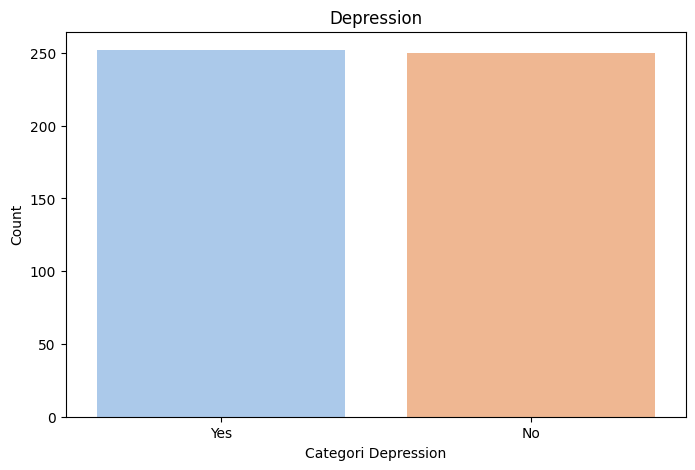

In [18]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Depression', palette='pastel', order=df['Depression'].value_counts().index)
plt.title('Depression')
plt.xlabel('Categori Depression')
plt.ylabel('Count')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,267
Female,235


In [ ]:
 df['Sleep Duration'].value_counts()

,count
Sleep Duration,
7-8 hours,128
More than 8 hours,128
5-6 hours,123
Less than 5 hours,123


In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,172
Unhealthy,169
Healthy,161


In [ ]:
df['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,260
No,242


In [ ]:
df['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,265
Yes,237


In [ ]:
df['Depression'].value_counts()

,count
Depression,
Yes,252
No,250


In [7]:
Gender_mapping = {'Male': 0, 'Female': 1}

Depression_mapping = {'No': 0, 'Yes': 1}

df['Gender'] = df['Gender'].map(Gender_mapping)

df['Depression'] = df['Depression'].map(Depression_mapping)

In [8]:
Sleep_Duration_mapping = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3}
Dietary_Habits_mapping = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}

df['Sleep Duration'] = df['Sleep Duration'].map(Sleep_Duration_mapping)
df['Dietary Habits'] = df['Dietary Habits'].map(Dietary_Habits_mapping)


In [9]:
encode = LabelEncoder()
df_categorical =[]
for column in df.columns:
    if df[column].dtypes=="object":
        df_categorical.append(column)
for column in df_categorical:
    df[column] = encode.fit_transform(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    int64  
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    int64  
 5   Dietary Habits                         502 non-null    int64  
 6   Have you ever had suicidal thoughts ?  502 non-null    int64  
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    int64  
 10  Depression                             502 non-null    int64  
dtypes: flo

In [ ]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,28,2.0,4.0,2,1,1,9,2,1,0
1,0,28,4.0,5.0,1,0,1,7,1,1,0
2,0,25,1.0,3.0,1,2,1,10,4,0,1
3,0,23,1.0,4.0,3,2,1,7,2,1,0
4,1,31,1.0,5.0,3,0,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,0,26,5.0,2.0,3,2,0,8,3,0,1
498,0,24,2.0,1.0,0,2,1,8,5,0,1
499,1,23,3.0,5.0,1,0,0,1,5,1,0
500,0,33,4.0,4.0,3,0,0,8,1,1,0


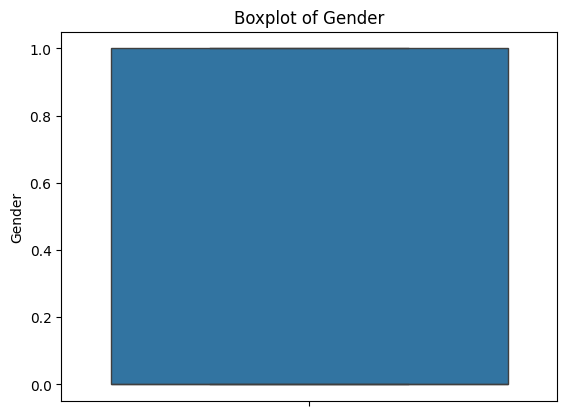

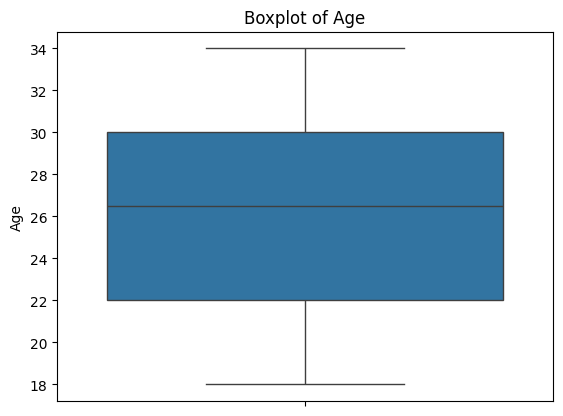

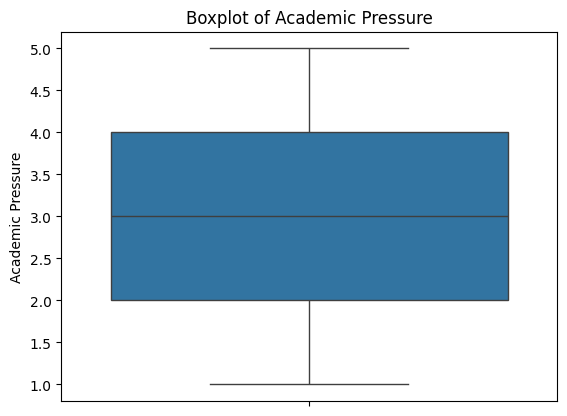

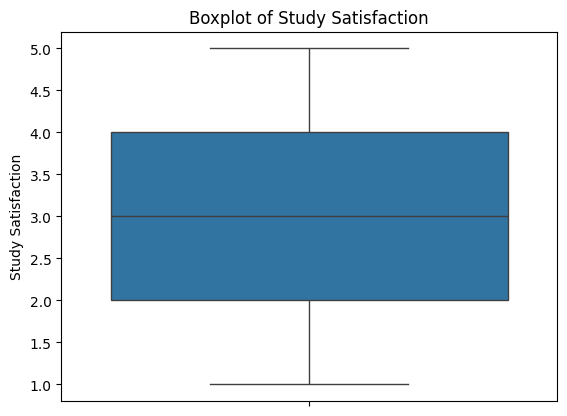

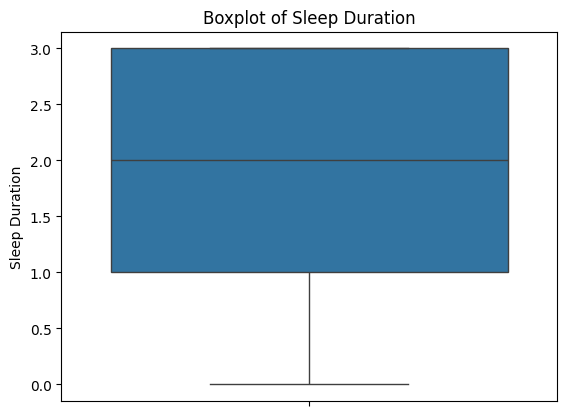

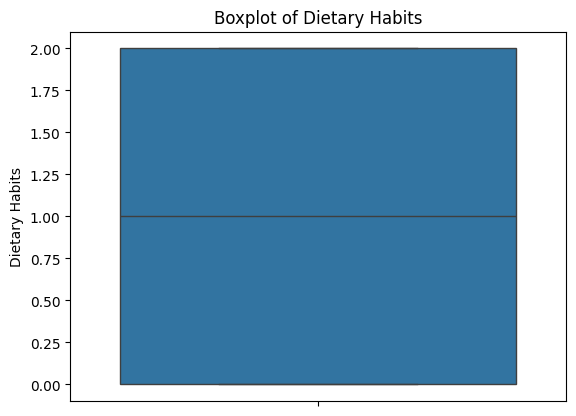

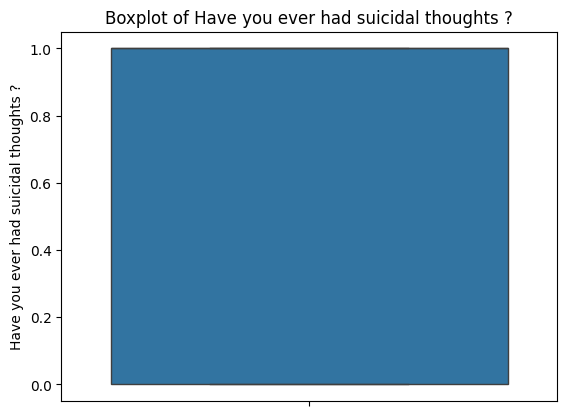

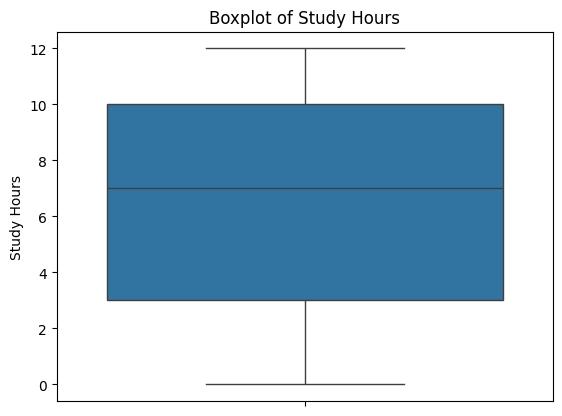

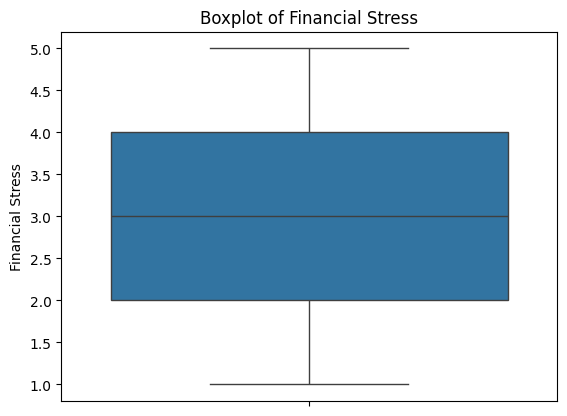

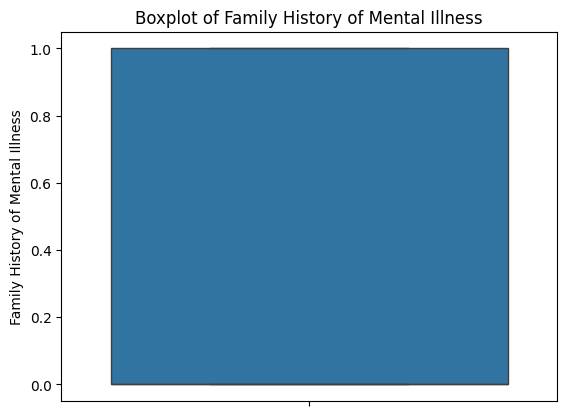

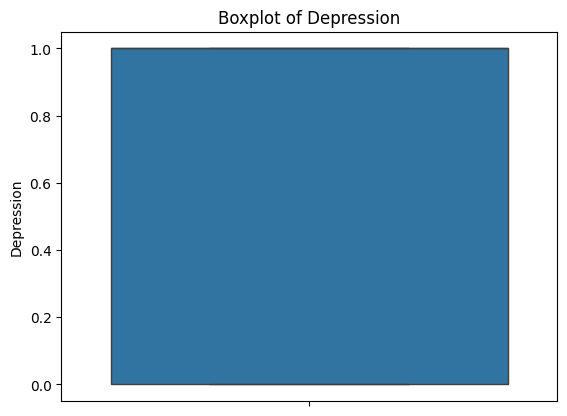

In [ ]:
for col in df:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

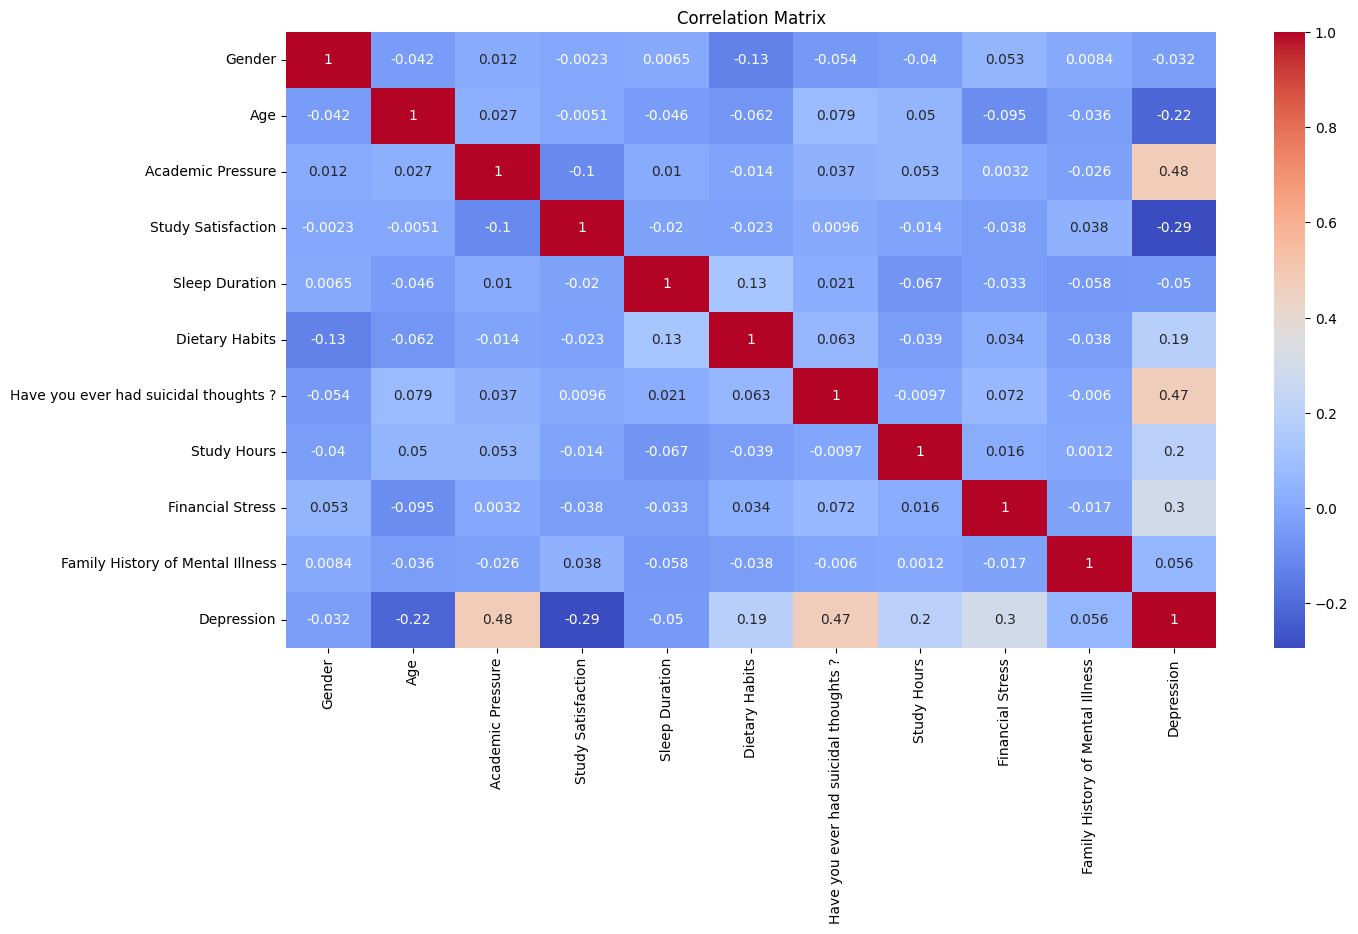

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier

In [ ]:
new_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
x = df.drop(columns=["Depression"])
y =df["Depression"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
y_train

,Depression
116,1
45,0
16,1
464,1
358,0
...,...
106,0
270,1
348,1
435,1


In [ ]:
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(ccp_alpha=0.001),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LGBMClassifier(verbose=-1)
]

from sklearn.metrics import accuracy_score
results={}
for model in model_list:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    results[type(model).__name__] = accuracy

for model_name, accuracy in results.items():
    print(model_name , (accuracy*100))

LogisticRegression 98.01324503311258
DecisionTreeClassifier 84.76821192052981
RandomForestClassifier 96.02649006622516
GradientBoostingClassifier 94.70198675496688
AdaBoostClassifier 98.01324503311258
SVC 83.44370860927152
GaussianNB 95.36423841059603
KNeighborsClassifier 77.48344370860927
LinearDiscriminantAnalysis 98.01324503311258
QuadraticDiscriminantAnalysis 96.02649006622516
LGBMClassifier 94.03973509933775


In [ ]:
max_classifier = max(results, key=results.get)
max_accuracy = results[max_classifier]

print("The classifier with the maximum accuracy is:", max_classifier ,"with accuracy" ,max_accuracy)

The classifier with the maximum accuracy is: LogisticRegression with accuracy 0.9801324503311258


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
model.score(x_train, y_train)


0.9886039886039886

In [ ]:
Y_pred = model.predict(x_test)
print(accuracy_score(y_test, Y_pred))

0.9801324503311258
